#### Mô hình hoá dữ liệu NAO

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acovf, acf

In [2]:
# Tải dữ liệu
Nao = pd.read_csv("../Data/NAO.csv").set_index('Year')
Nao.tail()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2016,0.12,1.58,0.73,0.38,-0.77,-0.43,-1.76,-1.65,0.61,0.41,-0.16,0.48
2017,0.48,1.00,0.74,1.73,-1.91,0.05,1.26,-1.10,-0.61,0.19,0.00,0.88
2018,1.44,1.58,-0.93,1.24,2.12,1.09,1.39,1.97,1.67,0.93,-0.11,0.61
2019,0.59,0.29,1.23,0.47,-2.62,-1.09,-1.43,-1.17,-0.16,-1.41,0.28,1.20
2020,1.34,1.26,1.01,-1.02,-0.41,-0.15,-1.23,0.12,0.98,-0.65,2.54,-0.30


In [3]:
# Định dạng lại dữ liệu
Month = pd.period_range(start='1950-01', end='2020-12', freq='M')
values = Nao.values.flatten()
data = pd.DataFrame({'Month': Month, 'NAO': values}).set_index('Month')
data.tail()

,NAO
Month,
2020-08,0.12
2020-09,0.98
2020-10,-0.65
2020-11,2.54
2020-12,-0.30


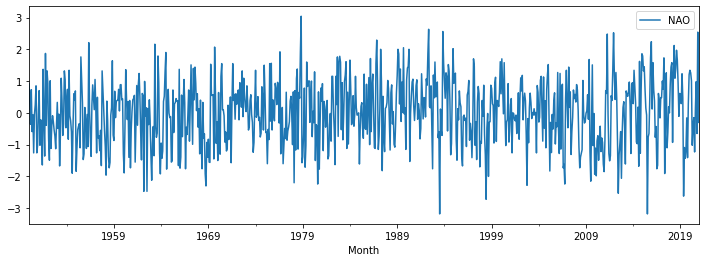

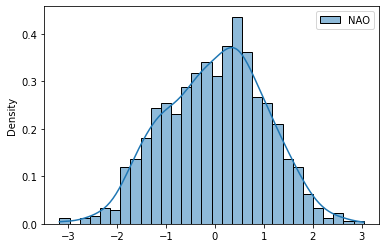

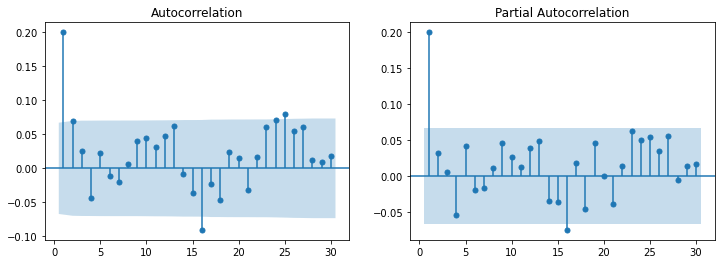

In [4]:
# Vẽ đồ thị đường dữ liệu
Nao, ax1 = plt.subplots(figsize=(12,4))
data.plot(style='-', linewidth=1.5, ax=ax1)

# Vẽ histogram
import seaborn as sns
hist, ax2 = plt.subplots(figsize=(6,4))
sns.histplot(data, bins=30, stat="density", kde = True, ax=ax2)

# Vẽ đồ thị ACFs, PACFs
ACF, ax3 = plt.subplots(1,2, figsize = (12,4))
fig = plot_acf(data, lags = 30, zero = False, ax = ax3[0])
fig = plot_pacf(data, lags = 30, zero = False, 
                method = 'ywm', ax = ax3[1])

In [5]:
from statsmodels.tsa.ar_model import AutoReg

# Ước lượng mô hình AR(1) của dữ liệu NAO
model = AutoReg(data.values, lags = 1)
result = model.fit()
result.summary()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  852
Model:                     AutoReg(1)   Log Likelihood               -1208.403
Method:               Conditional MLE   S.D. of innovations              1.001
Date:                Thu, 14 Dec 2023   AIC                              0.009
Time:                        21:40:21   BIC                              0.026
Sample:                             1   HQIC                             0.016
                                  852                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0008      0.034     -0.023      0.982      -0.068       0.066
y.L1           0.2002      0.034      5.963      0.000       0.134       0.266
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            4.9951           +0.0000j            4.9951            0.0000
-----------------------------------------------------------------------------
"""

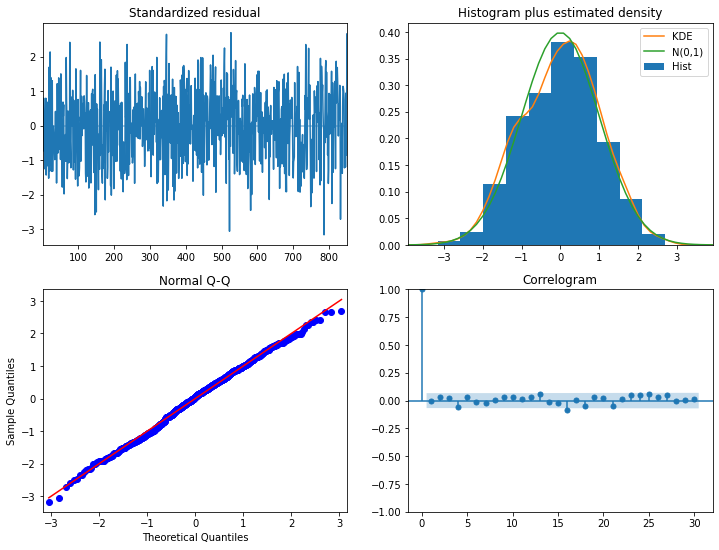

In [6]:
# Phân tích phần dư bằng hình ảnh
fig = result.plot_diagnostics(fig=plt.figure(figsize=(12,9)), lags=30)

In [7]:
# Tính phần dư
resid = result.resid

# Tình qstat với các độ trễ khác nhau
r, q , p = acf(resid, nlags=30, qstat= True) # Output: [acf, qstat, p-value]

# Biểu diễn bảng
pd.DataFrame(np.array([np.arange(1,31,4), r[1::4], q[::4], p[::4]]).T,
             columns=['lag','acf','qstat','p-value']).set_index('lag')

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


,acf,qstat,p-value
lag,,,
1.0,-0.006501,0.036093,0.849323
5.0,0.036014,4.994974,0.416494
9.0,0.032994,6.438828,0.695321
13.0,0.058228,11.508548,0.568294
17.0,0.005289,18.296607,0.370364
21.0,-0.044282,23.795815,0.303057
25.0,0.061383,30.987408,0.189436
29.0,0.004039,34.124818,0.234720
